In [ ]:
import numpy as np
import pandas as pd
import gzip
import os
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR,LinearSVR
from sklearn.manifold import TSNE
import random
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from skimage import color
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
import cv2
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV
import time


In [ ]:
import math

def function_rez_complex(x, y):
    """
    This function takes in three arguments, x, y, and returns the result of x cubed plus the sine of y.
    """
    return x**3 + math.sin(y) 



In [ ]:
def function_rez_simple(x,y):


    return x**2+3*y

In [ ]:
import numpy as np

# set the seed for reproducibility
np.random.seed(42)

# create a random numpy array with 2   features and 5000 rows
array_3x5000 = np.random.randint(-100, 101, size=(5000, 1))

function_res_simple = np.array([function_rez_simple(item[0],item[1]) for item in array_3x5000])
print(function_res_simple)


[ 241 -194  -51 ... 6415  -41 8878]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(array_3x5000, function_res_simple, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3500, 2) (1500, 2) (3500,) (1500,)


In [ ]:


# Use GridSearchCV to search for the best hyperparameters
from sklearn.model_selection import GridSearchCV


def experiment_model(X_train,y_train,X_test):

    result_list = []


    # Initialize the SVM with a rbf kernel
    svm_model = SVR(kernel='rbf')

    # Define the parameter grid for gamma and C
    param_grid = {"gamma": ["auto", "scale"], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    clf_one = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_one.fit(X_train, y_train)
    Predicted_labels= clf_one.predict(X_test)
    result_list.append((Predicted_labels,clf_one))
    print(f"SVM , Kernal = RBF , Best parameters: {clf_one.best_params_}")



    print("SVM , Kernel = Linear ")
    param_grid = {'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    svm_model = LinearSVR()
    clf_two = GridSearchCV(estimator=svm_model, param_grid=param_grid)
    clf_two.fit(X_train, y_train)
    Predicted_labels= clf_two.predict(X_test)
    result_list.append((Predicted_labels,clf_two))
    print(f"SVM , Kernal = Linear , Best parameters: {clf_two.best_params_}")




    #Initialize the SVM with a polynomial kernel
    param_grid = {"degree": [2, 3, 4],"C": [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    svm_model = SVR(kernel='poly')
    clf_three = GridSearchCV(estimator=svm_model, param_grid=param_grid,cv=5)
    clf_three.fit(X_train, y_train)
    Predicted_labels= clf_three.predict(X_test)
    result_list.append((Predicted_labels,clf_three))
    print(f"SVM , Kernel = Poly , Best parameters: {clf_three.best_params_}")


    # Initialize the SVM with a Sigmoid kernel
    param_grid = {'gamma': [0.1, 1, 10], 'C': [0.0001, 0.001, 0.1, 1, 10, 100, 1000]}
    svm_model = SVR(kernel='sigmoid')
    clf_four = GridSearchCV(estimator=svm_model, param_grid=param_grid,cv=5)
    clf_four.fit(X_train, y_train)
    Predicted_labels= clf_four.predict(X_test)
    result_list.append((Predicted_labels,clf_four))
    print(f"SVM , Kernel = Sigmoid , Best parameters: {clf_four.best_params_}")




    return result_list

In [ ]:
result = experiment_model(X_train, y_train,X_test)

SVM , Kernal = RBF , Best parameters: {'C': 1000, 'gamma': 'scale'}
SVM , Kernel = Linear 


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

SVM , Kernal = Linear , Best parameters: {'C': 100}
SVM , Kernel = Poly , Best parameters: {'C': 100, 'degree': 2}
SVM , Kernel = Sigmoid , Best parameters: {'C': 1, 'gamma': 0.1}


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
def find_metic_for_reqerssion(y_true,y_pred,score,model_name):
    print(f"{model_name} :")
    print(f"score: {score}")
    print(f"MSE: {mean_squared_error(y_true, y_pred)}")
    print(f"RMSE: {math.sqrt(mean_squared_error(y_true, y_pred))}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred)}")

In [ ]:

find_metic_for_reqerssion(y_test,result[0][0],result[0][1].score(X_test,y_test),"RBF")

RBF :
score: 0.9996941039139171
MSE: 2758.478988561318
RMSE: 52.521224172341206
MAE: 20.40949657488448


In [ ]:
find_metic_for_reqerssion(y_test,result[1][0],result[1][1].score(X_test,y_test),"Linner")

Linner :
score: -0.09164987858789275
MSE: 9844170.585870633
RMSE: 3137.542124955557
MAE: 2533.7612747774447


In [ ]:
find_metic_for_reqerssion(y_test,result[2][0],result[2][1].score(X_test,y_test),"Poly")

Poly :
score: 0.994814537138211
MSE: 46760.94595840491
RMSE: 216.24279400341857
MAE: 149.13274499514225


In [ ]:
find_metic_for_reqerssion(y_test,result[3][0],result[3][1].score(X_test,y_test),"Sigmoid")

Sigmoid :
score: -0.07171844982742703
MSE: 9664434.95030957
RMSE: 3108.7674326506913
MAE: 2523.8823638949107


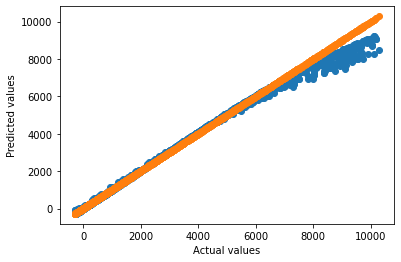

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions


# Fit the SVR model with RBF kernels
rbf = SVR(kernel='rbf',C=100,gamma='scale').fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, rbf.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

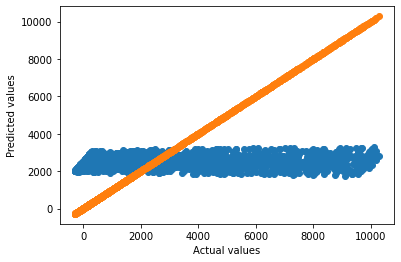

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# poly = SVR(kernel='poly',C=100,degree=2).fit(X,y)
# sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X,y)


# Fit the SVR model with Linear kernels
linear = SVR(kernel='linear',C=100).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, linear.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

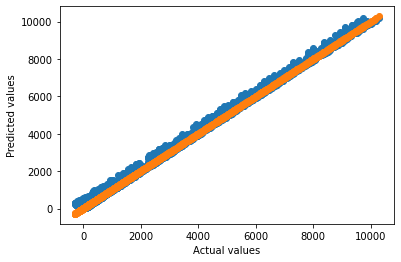

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X,y)


# Fit the SVR model with poly kernels
poly = SVR(kernel='poly',C=100,degree=2).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, poly.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

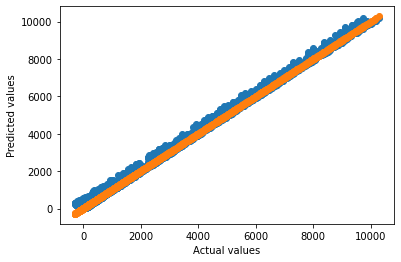

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions



# Fit the SVR model with poly kernels
sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, poly.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

In [ ]:
import numpy as np

# set the seed for reproducibility
np.random.seed(42)

# create a random numpy array with 3 features and 5000 rows
array_3x5000 = np.random.randint(-100, 101, size=(5000, 2))

function_res_simple = np.array([function_rez_complex(item[0],item[1]) for item in array_3x5000])
print(function_res_simple)


[ 7.55588733e+00 -5.11076542e+02  2.16663634e+02 ...  4.93039993e+05
  9.39264431e-03  8.57375954e+05]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(array_3x5000, function_res_simple, test_size=0.3, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3500, 2) (1500, 2) (3500,) (1500,)


In [ ]:
result = experiment_model(X_train, y_train,X_test)

SVM , Kernal = RBF , Best parameters: {'C': 1000, 'gamma': 'scale'}
SVM , Kernel = Linear 


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM , Kernal = Linear , Best parameters: {'C': 100}
SVM , Kernel = Poly , Best parameters: {'C': 1000, 'degree': 3}
SVM , Kernel = Sigmoid , Best parameters: {'C': 100, 'gamma': 0.1}


In [ ]:
find_metic_for_reqerssion(y_test,result[0][0],result[0][1].score(X_test,y_test),"RBF")

RBF :
score: 0.5629096164772925
MSE: 63904168535.264565
RMSE: 252792.73829614758
MAE: 153251.9044338921


In [ ]:
find_metic_for_reqerssion(y_test,result[1][0],result[1][1].score(X_test,y_test),"Linner")

Linner :
score: 0.8247297852091499
MSE: 25625128731.812115
RMSE: 160078.50802594368
MAE: 125780.14237595045


In [ ]:
find_metic_for_reqerssion(y_test,result[2][0],result[2][1].score(X_test,y_test),"Poly")

Poly :
score: 0.9999999999954751
MSE: 0.6615660160938548
RMSE: 0.813367085696154
MAE: 0.6961928603838737


In [ ]:
find_metic_for_reqerssion(y_test,result[3][0],result[3][1].score(X_test,y_test),"Sigmoid")

Sigmoid :
score: 0.3036208170768757
MSE: 101813113139.92166
RMSE: 319081.67158256157
MAE: 204222.15463810778


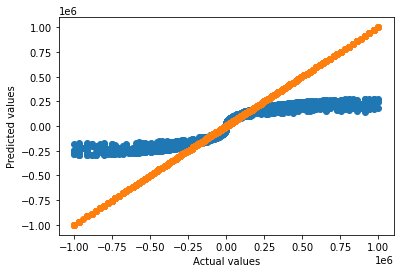

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions


# Fit the SVR model with RBF kernels
rbf = SVR(kernel='rbf',C=1000,gamma='scale').fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, rbf.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

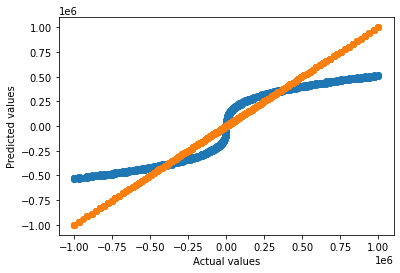

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# poly = SVR(kernel='poly',C=100,degree=2).fit(X,y)
# sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X,y)


# Fit the SVR model with Linear kernels
linear = SVR(kernel='linear',C=100).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, linear.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

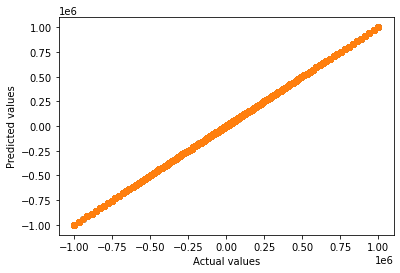

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions

# sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X,y)


# Fit the SVR model with poly kernels
poly = SVR(kernel='poly',C=1000,degree=3).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, poly.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

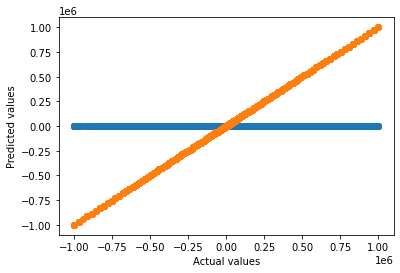

In [ ]:
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.plotting import plot_decision_regions



# Fit the SVR model with poly kernels
sigmoid = SVR(kernel='sigmoid',C=1,gamma=0.1).fit(X_train,y_train)

# Plot the actual target values against the predicted values
plt.scatter(y_test, sigmoid.predict(X_test))
plt.scatter(y_test,y_test)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()